In [1]:
import os
import numpy as np
import scipy.io
import pandas as pd
from pathlib import Path

In [2]:
database = pd.DataFrame(columns=['condition', 'name', 'ecg'])

# Create initial empty pandas database

In [3]:
from libraries.io import FileWizard

path1 = 'C:/Users/Oliver/Documents/FYP/code/database/MLII/'

fw = FileWizard()
database = fw.start(path1, database)
    
# Database details:

# The data contains 1000 ECG signals of size 3600
# There are 17 different heart rhythms in the dataset

# Conditions:

    # 1 NSR = Normal Sinus Rhythm [283 items]
    # 2 APB = Atrial Premature Beat [66 items]
    # 3 AFL = Atrial Flutter [20 items]
    # 4 AFIB = Atrial Fibrilation [135 items]
    # 5 SVTA = Superventricular tachycardia (abnormally fast heart beat above ventricular area) [13 items]
    # 6 WPW = Wolf-Parkinson White Syndrome [21 items]
    # 7 

In [4]:
print(database.head(5))

  condition      name                                                ecg
0     1 NSR  100m (0)  [953, 951, 949, 948, 950, 950, 951, 948, 946, ...
1     1 NSR  100m (1)  [915, 927, 934, 936, 935, 938, 938, 936, 935, ...
2     1 NSR  100m (2)  [989, 984, 981, 981, 983, 987, 984, 982, 982, ...
3     1 NSR  100m (3)  [957, 961, 961, 960, 960, 961, 964, 968, 968, ...
4     1 NSR  100m (4)  [942, 943, 943, 944, 948, 954, 955, 954, 955, ...


In [5]:
import matplotlib.pyplot as plt

def plot_example(case, data, title, i):
    examples = data[data['condition'] == case]
    example = examples.iloc[i]
    example_ecg = example['ecg']
    
    plt.figure(figsize=(15,4))
    plt.title(title)
    plt.plot(example_ecg)
    plt.show()
    
def plot_ext(case, data, title, i):
    examples = data[data['condition'] == case]
    example = examples.iloc[i]
    example_ecg = example['coefficient 4']
    
    plt.figure(figsize=(15,4))
    plt.title(title)
    plt.plot(example_ecg)
    plt.show()

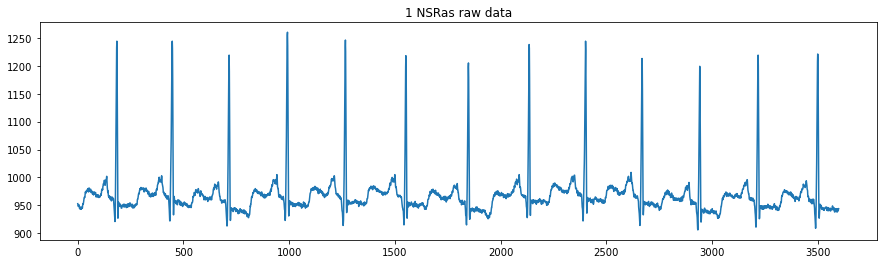

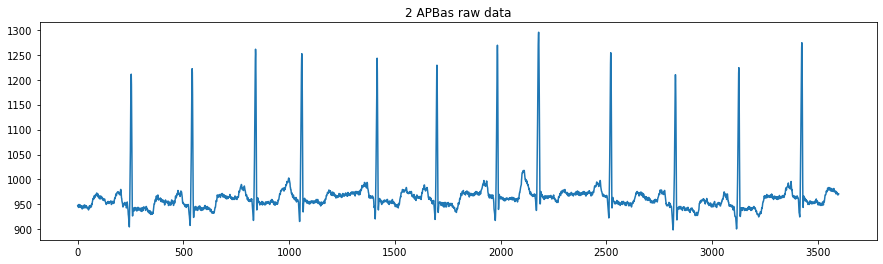

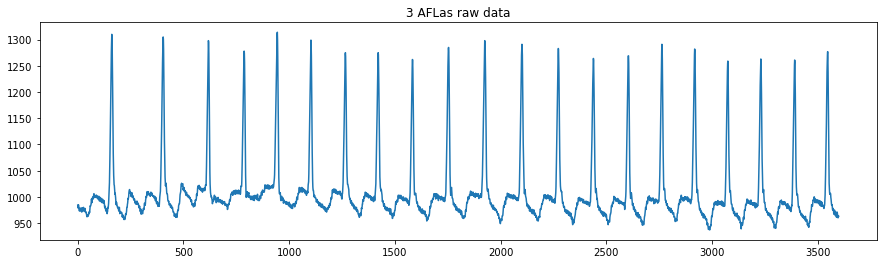

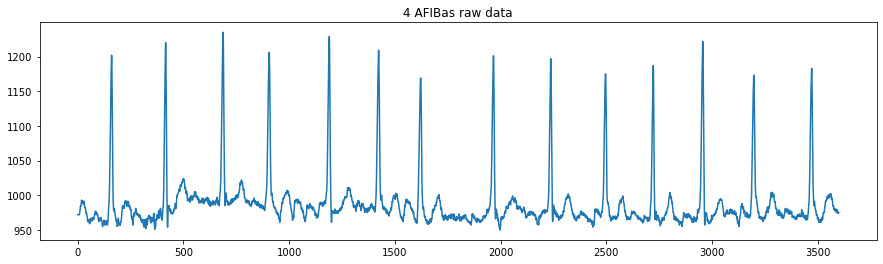

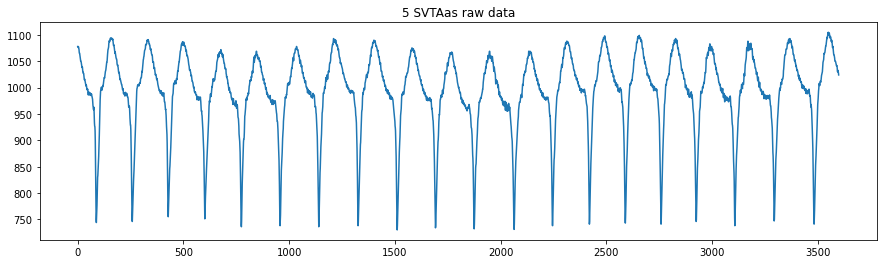

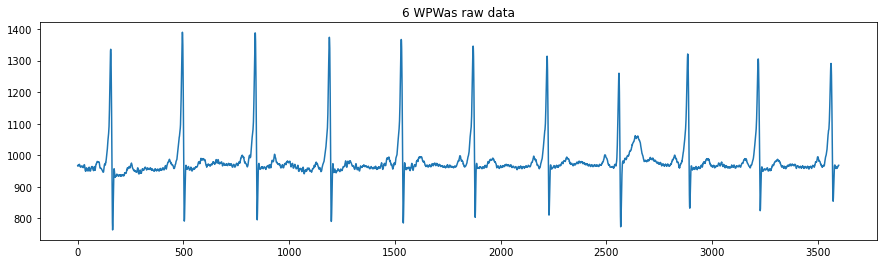

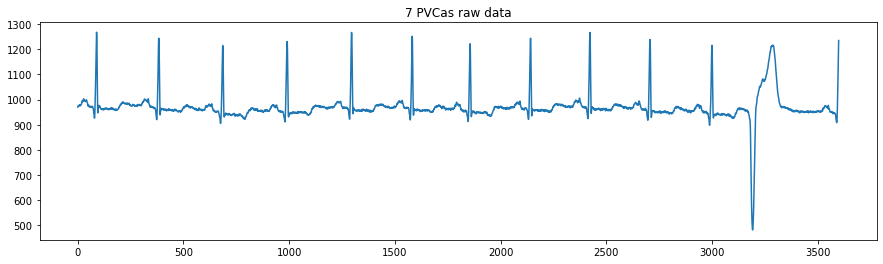

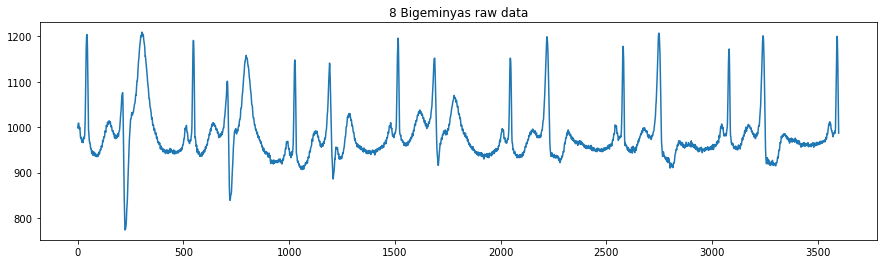

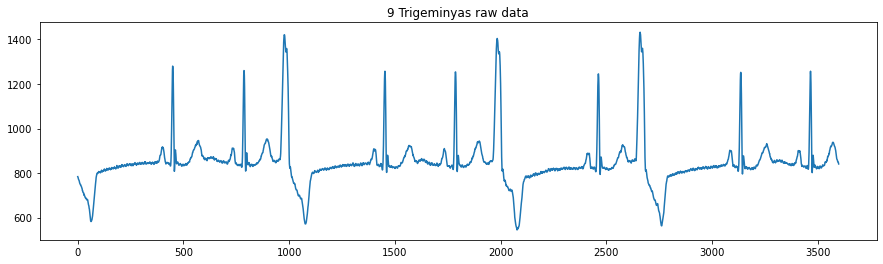

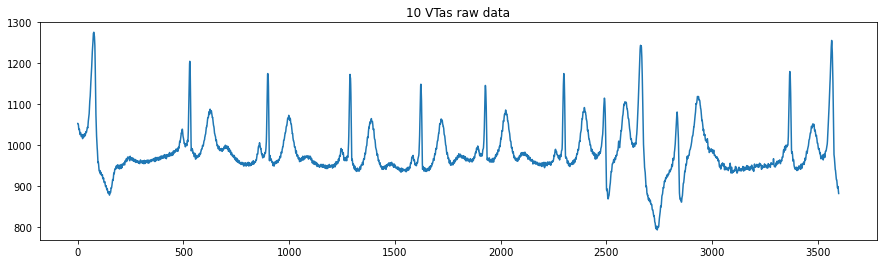

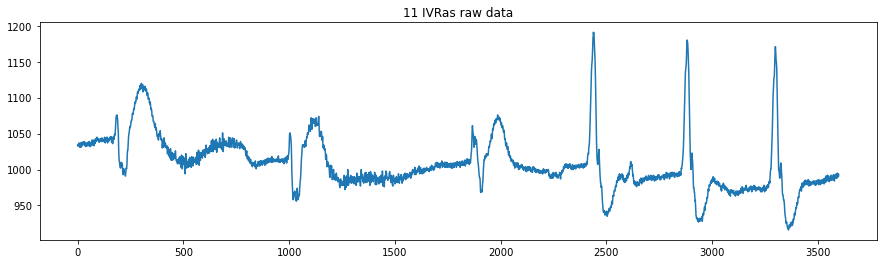

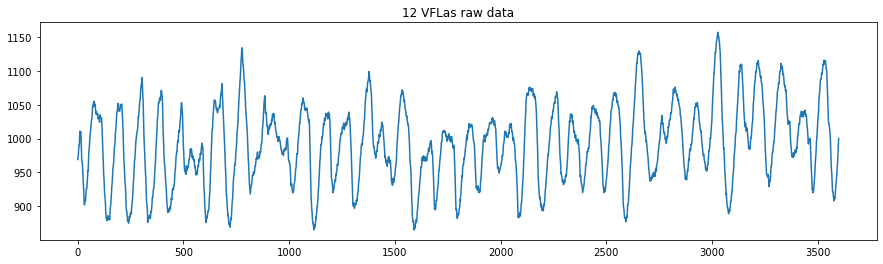

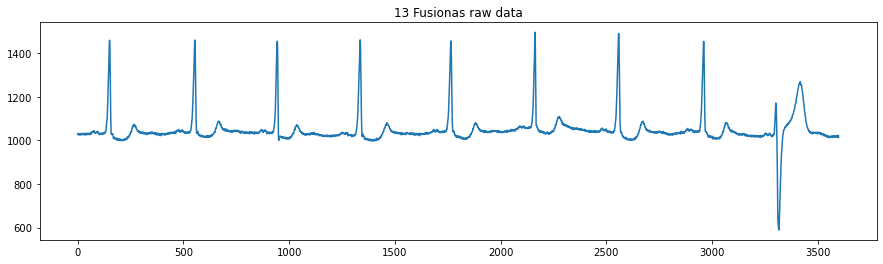

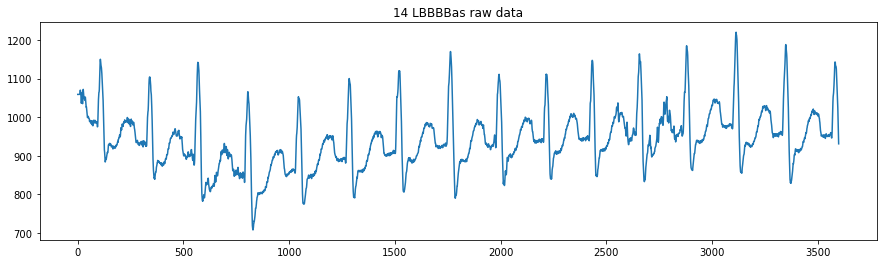

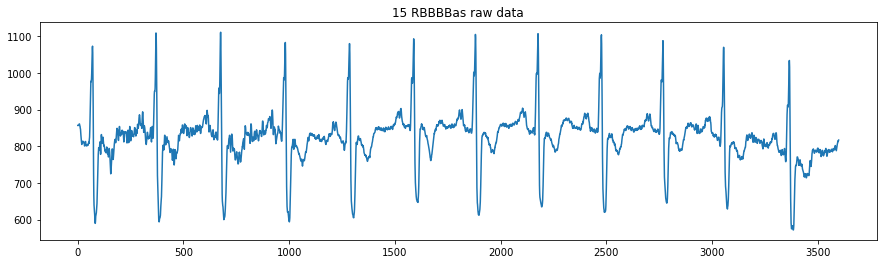

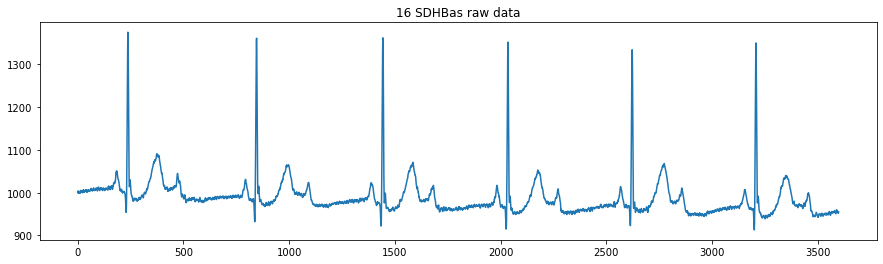

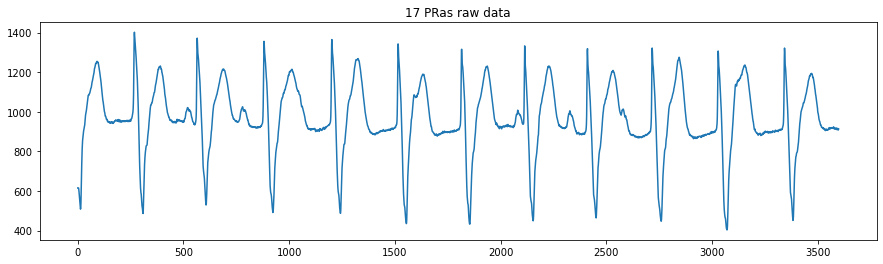

In [6]:
lists = ['1 NSR', '2 APB', '3 AFL', '4 AFIB', '5 SVTA', '6 WPW', 
         '7 PVC', '8 Bigeminy', '9 Trigeminy', '10 VT', '11 IVR', 
         '12 VFL', '13 Fusion', '14 LBBBB', '15 RBBBB', '16 SDHB', '17 PR']

for item in lists:
    plot_example(item, database, (item + 'as raw data'), 0)

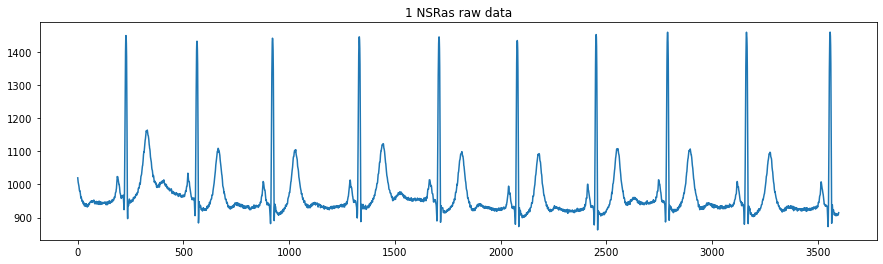

In [7]:
plot_example('1 NSR', database, ('1 NSR' + 'as raw data'), 50)

In [8]:
from libraries.noise_removal import BaselineNoiseRemover

# DC Notch filter to remove baseline noise from all signals

bnr = BaselineNoiseRemover(c = -0.99)

ecg_waves = database['ecg'].tolist()
ecg_filt = []

for wave in ecg_waves:
    filt = bnr.fit(wave)
    ecg_filt.append(filt)

database['ecg'] = pd.Series(ecg_filt)

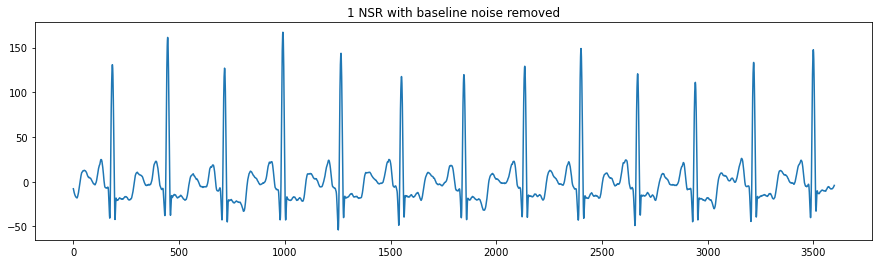

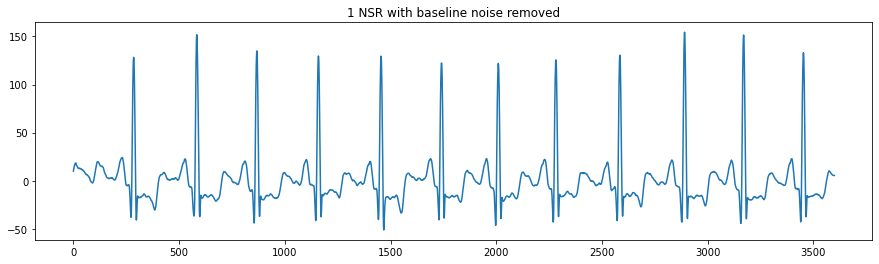

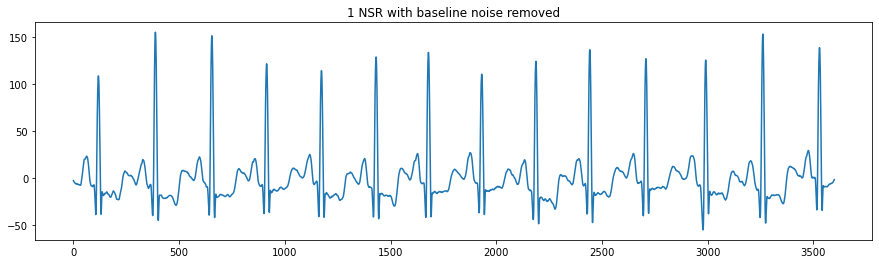

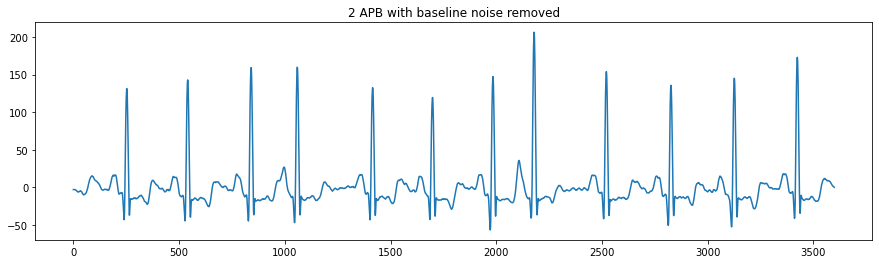

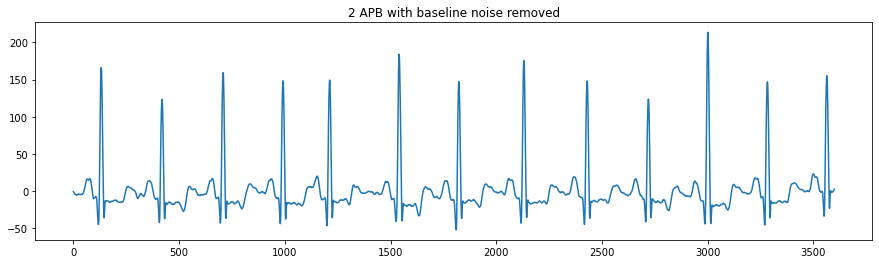

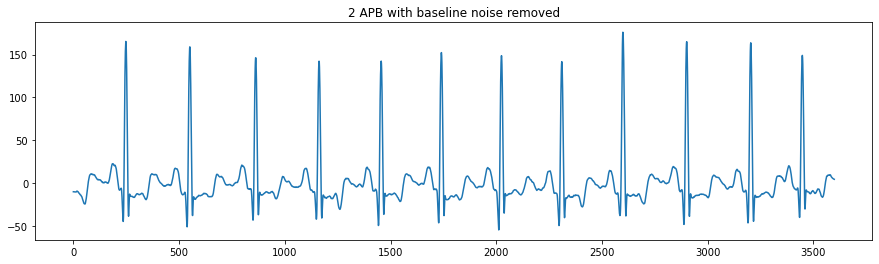

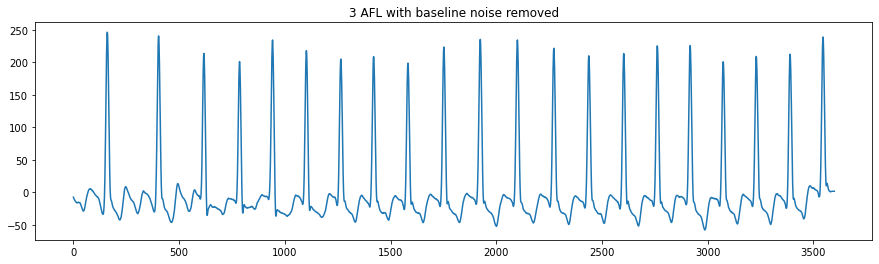

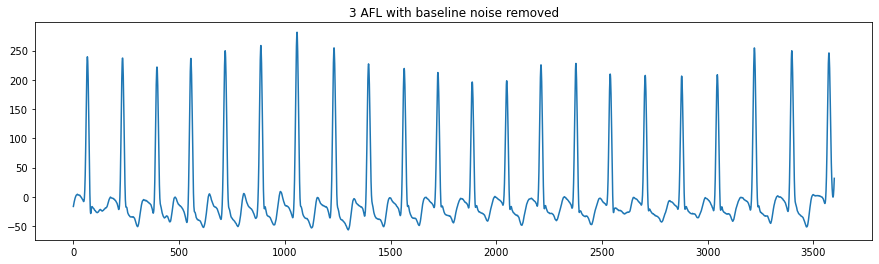

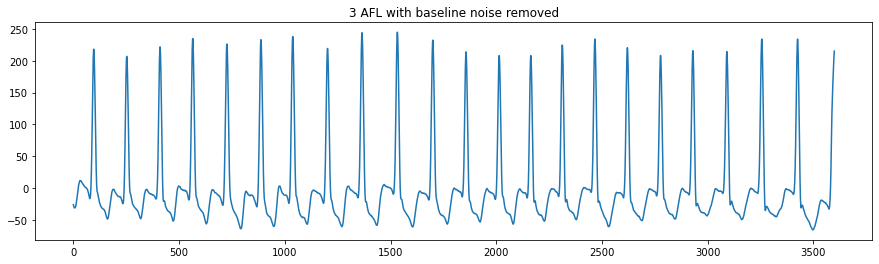

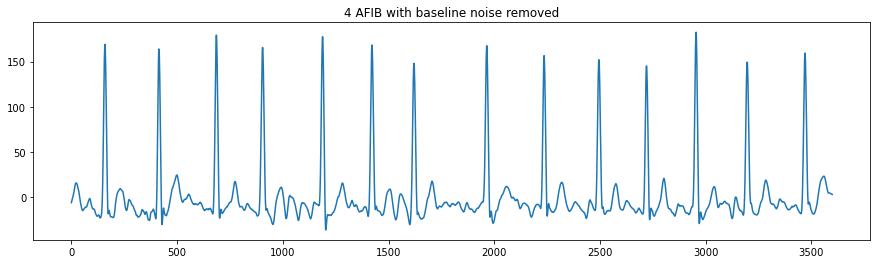

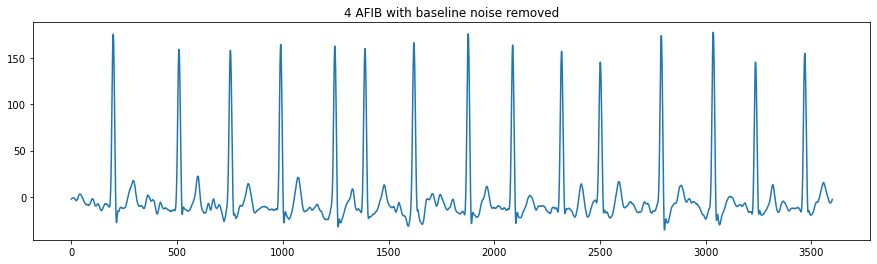

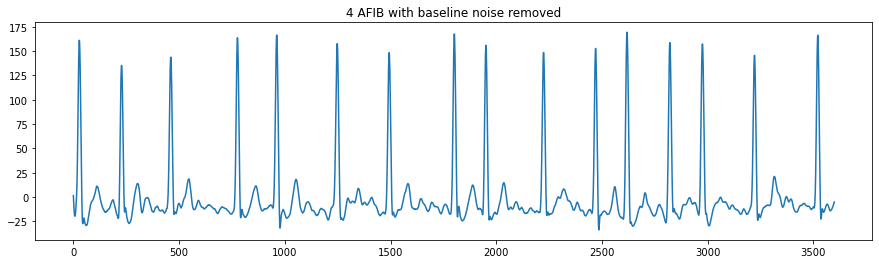

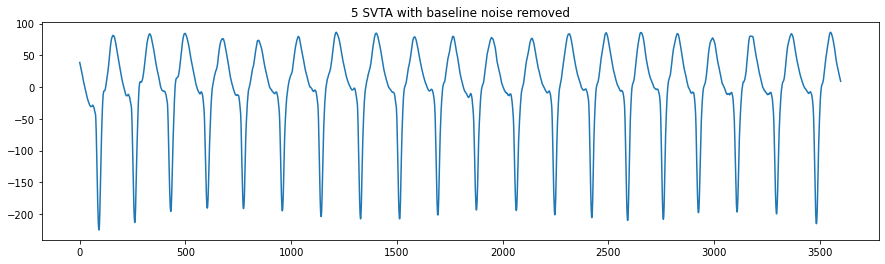

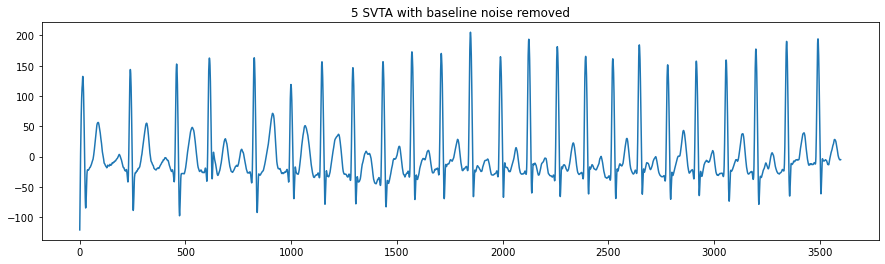

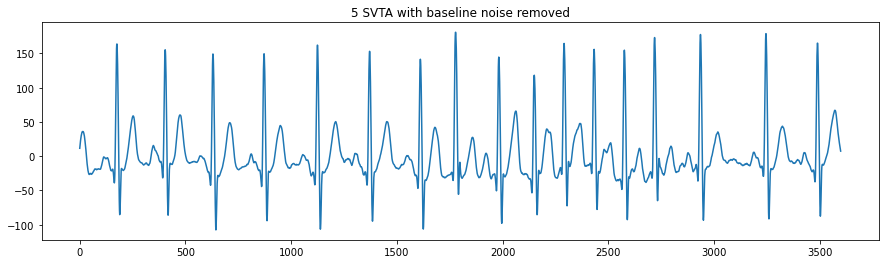

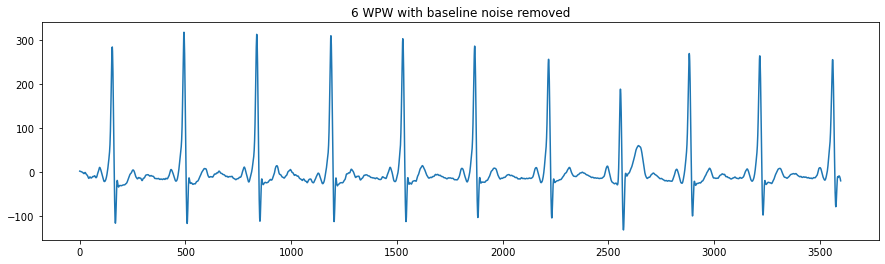

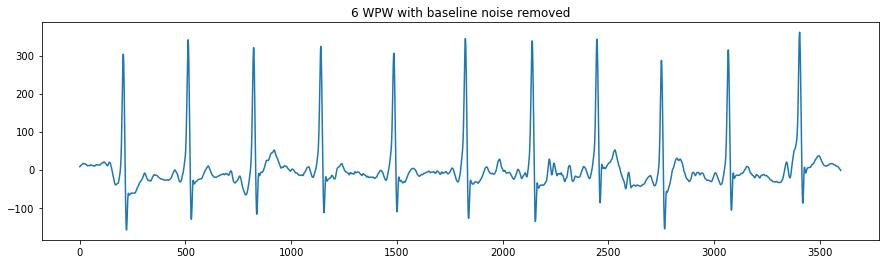

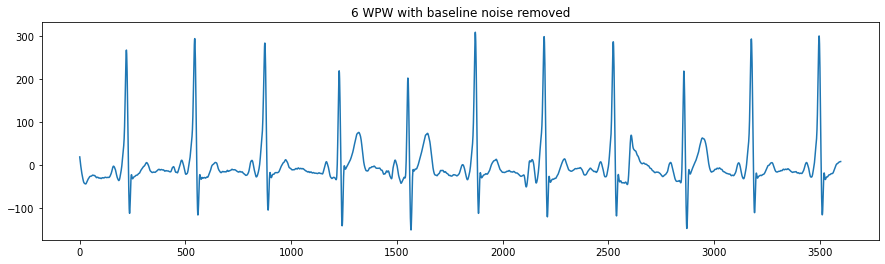

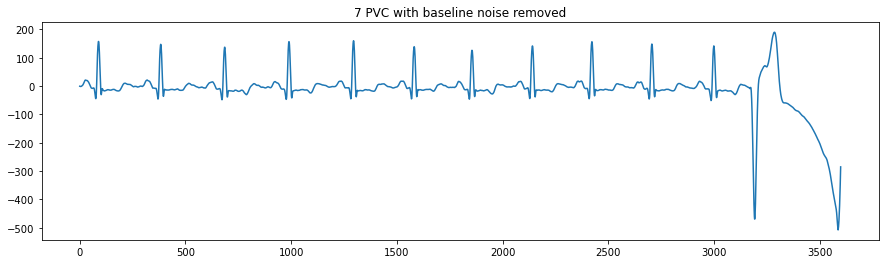

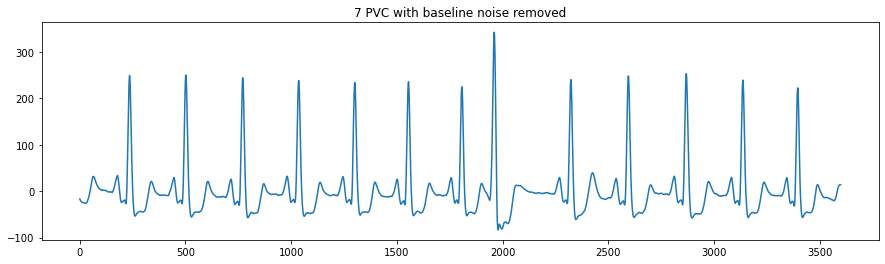

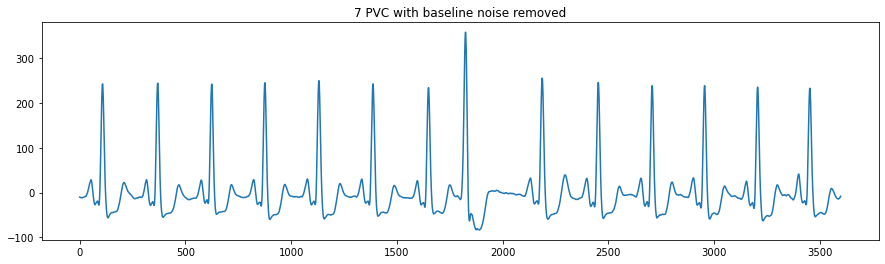

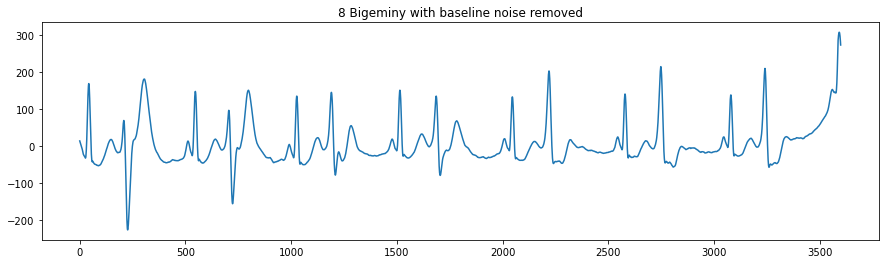

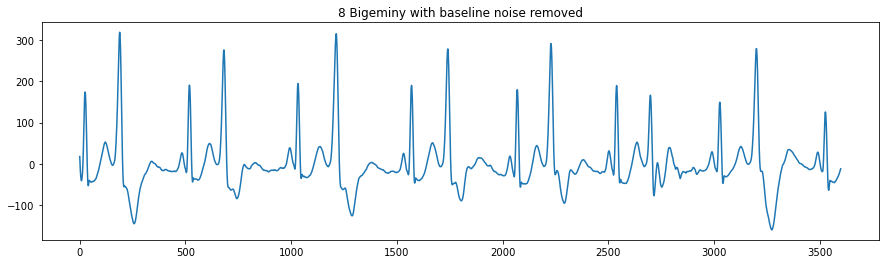

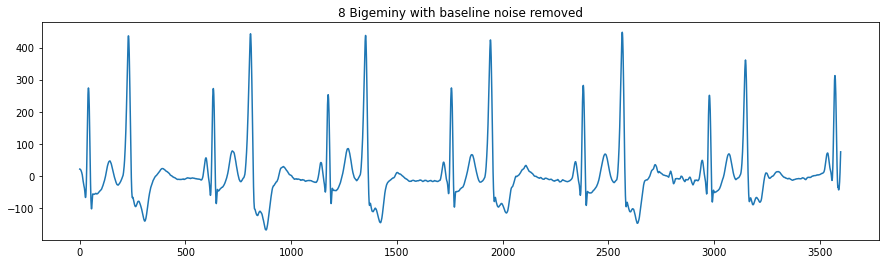

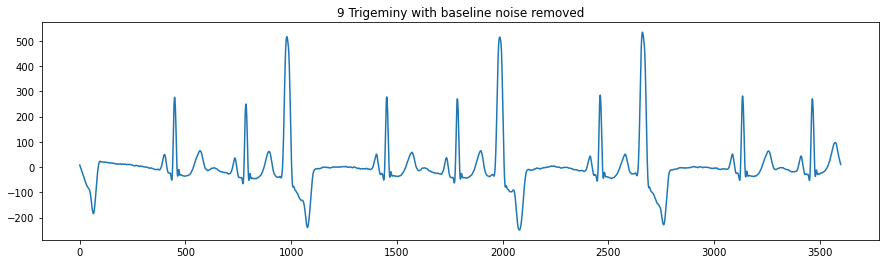

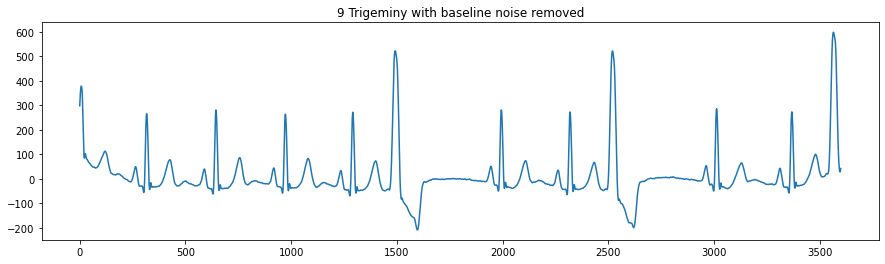

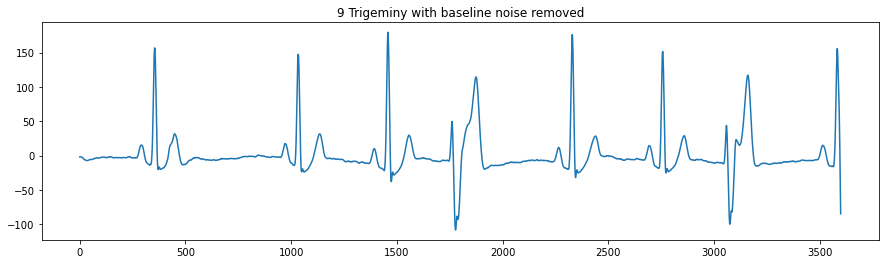

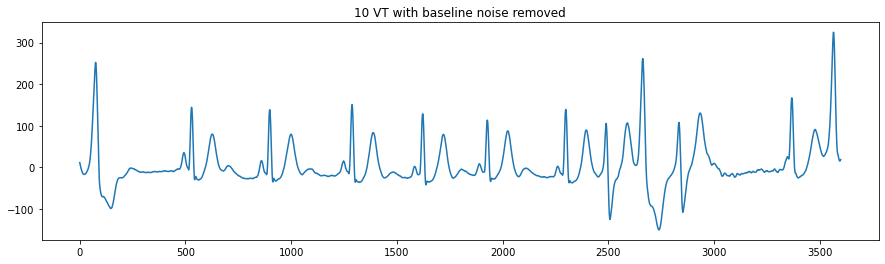

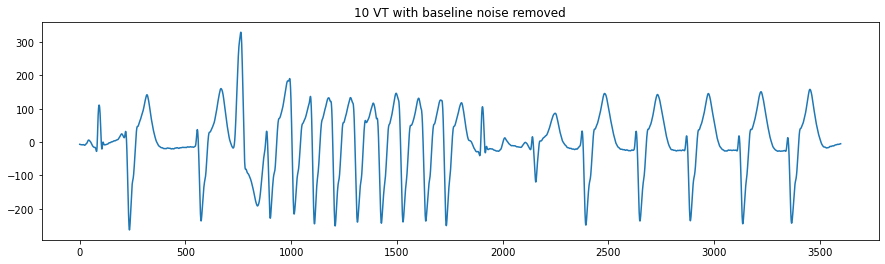

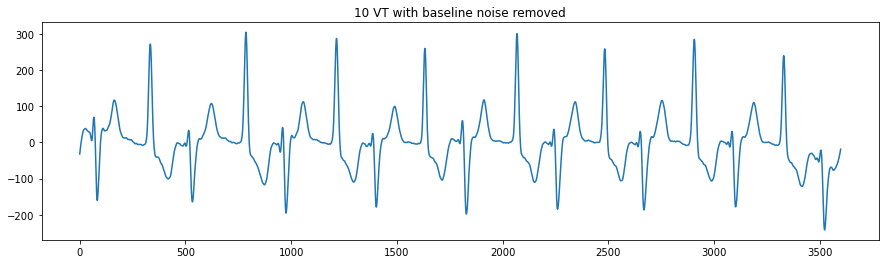

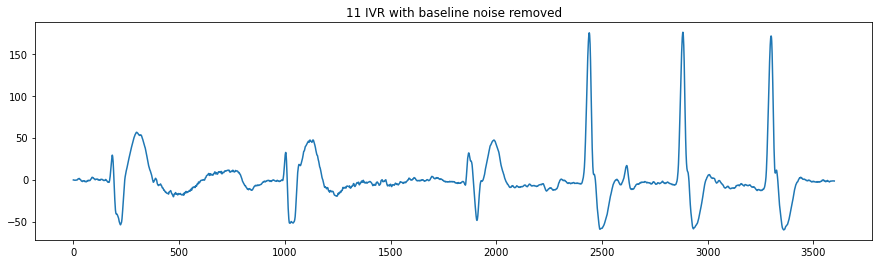

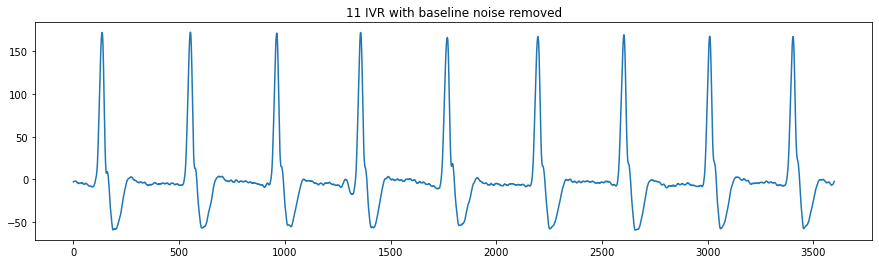

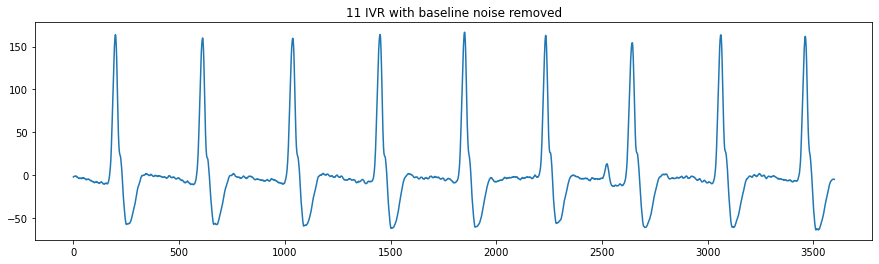

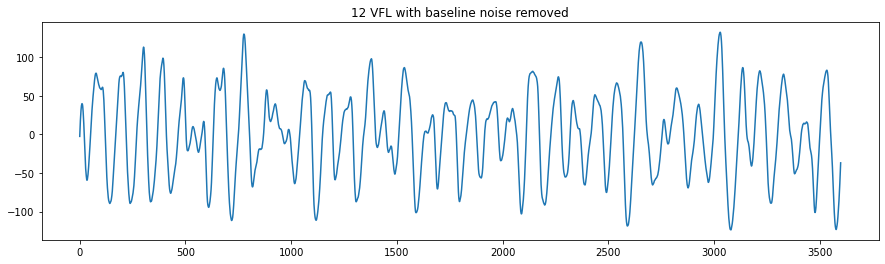

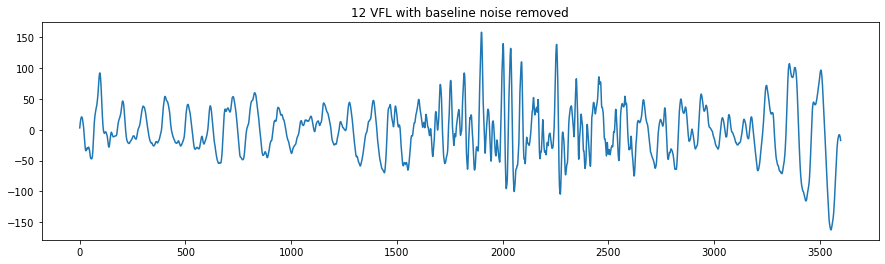

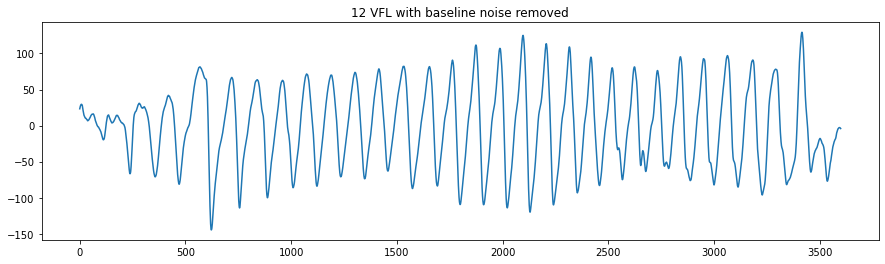

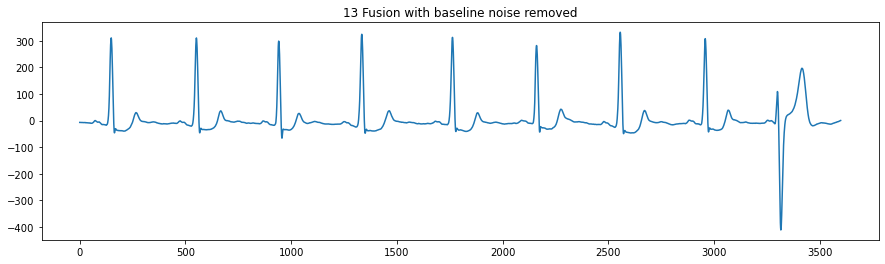

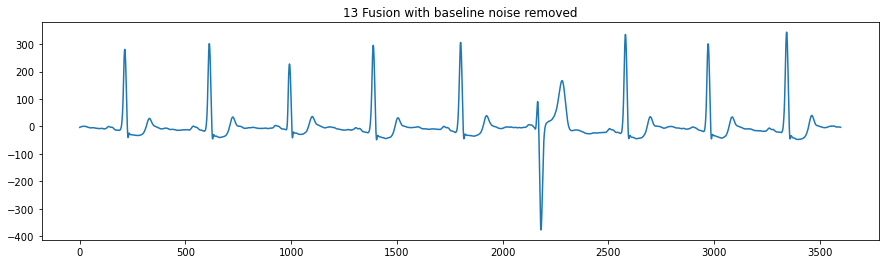

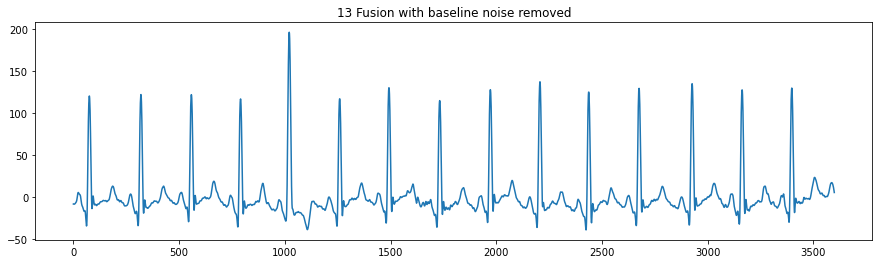

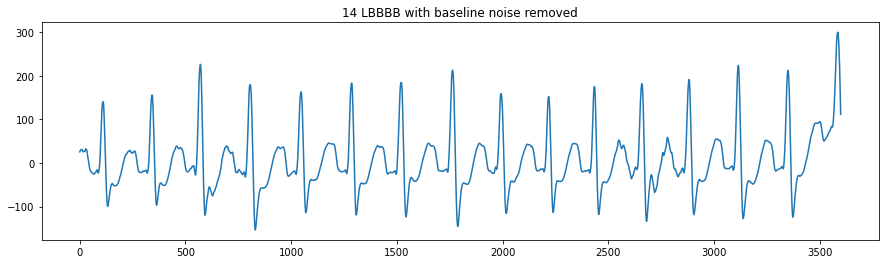

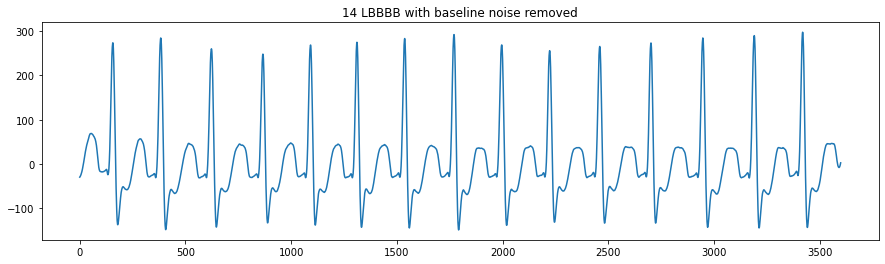

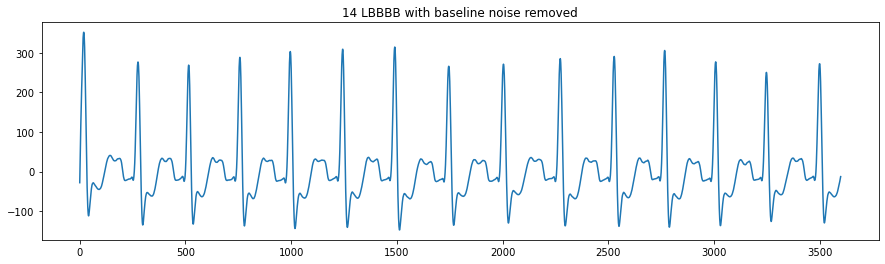

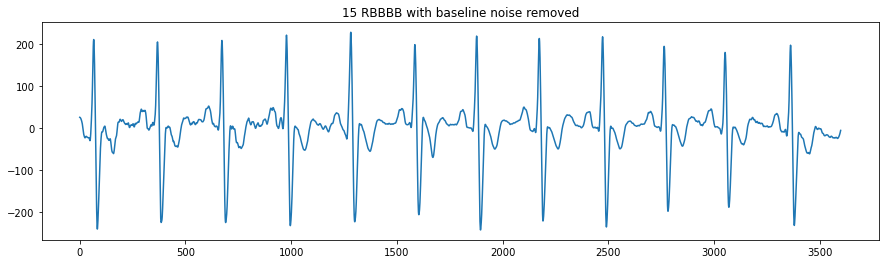

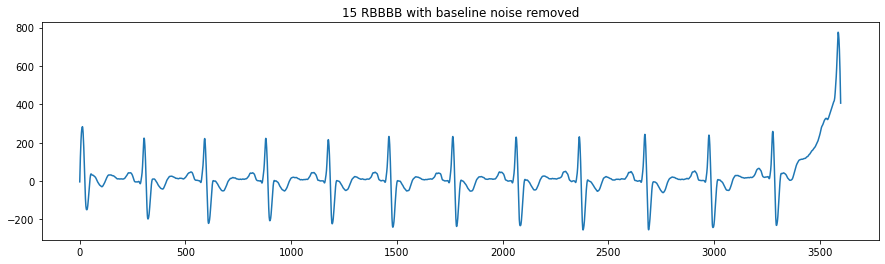

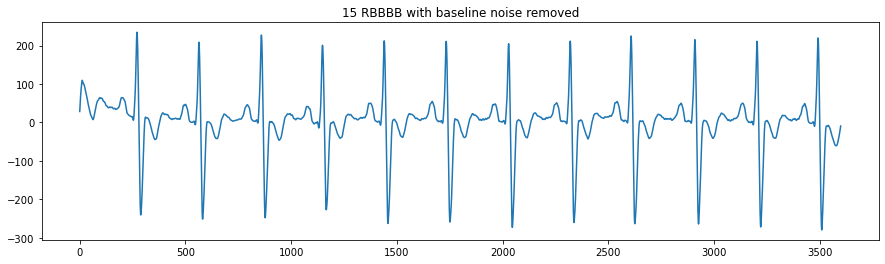

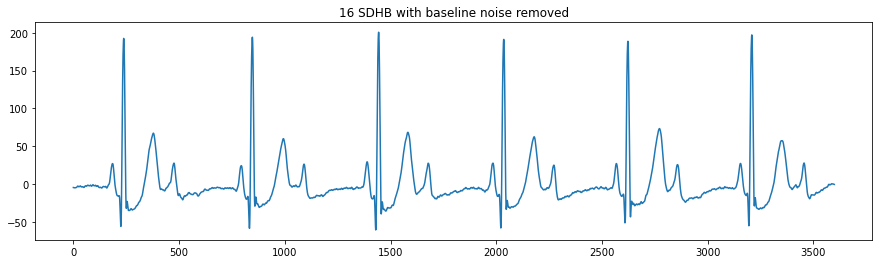

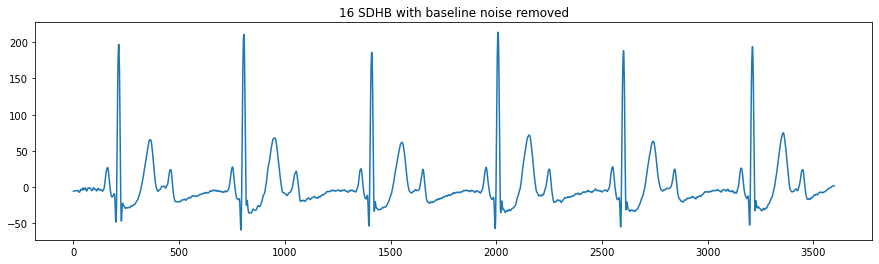

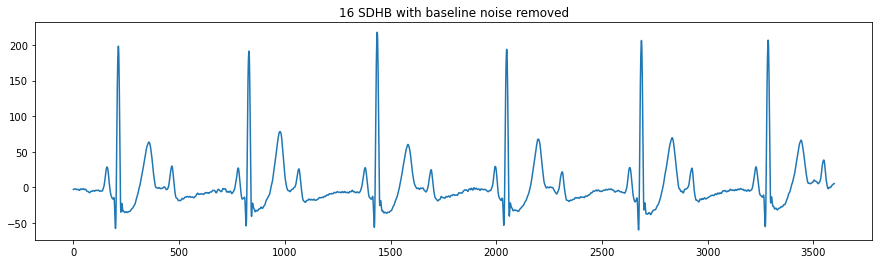

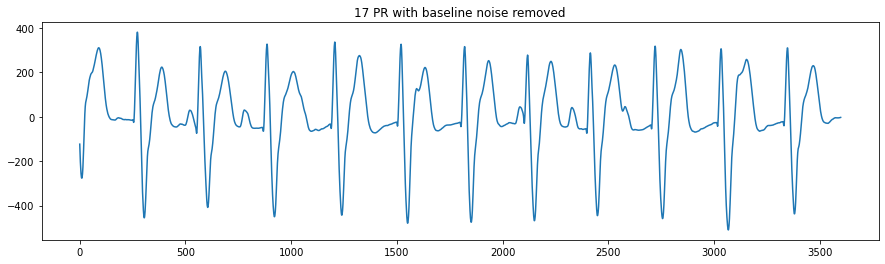

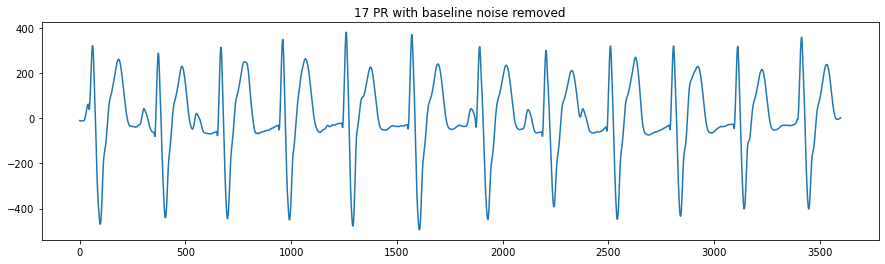

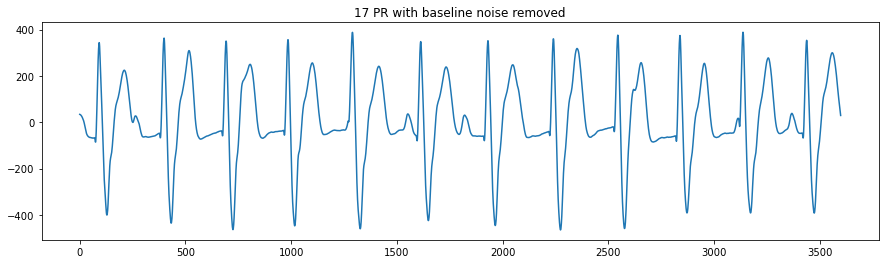

In [9]:
for item in lists:
    plot_example(item, database, (item + ' with baseline noise removed'), 0)
    plot_example(item, database, (item + ' with baseline noise removed'), 1)
    plot_example(item, database, (item + ' with baseline noise removed'), 2)

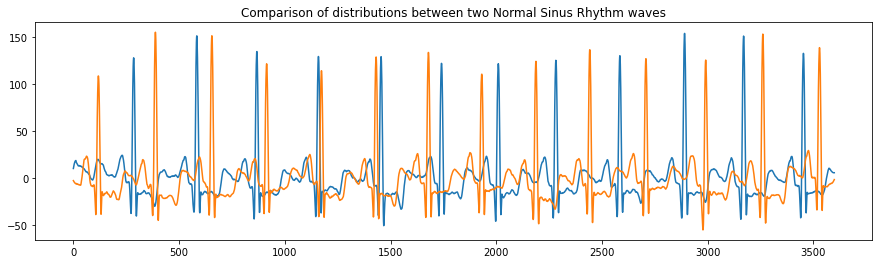

In [10]:
import seaborn as sns

examples = database[database['condition'] == '1 NSR']

example1 = examples.iloc[1]
example2 = examples.iloc[2]

ecg1 = example1['ecg']
ecg2 = example2['ecg']

plt.figure(figsize=(15,4))
plt.plot(ecg1)
plt.plot(ecg2)
plt.title('Comparison of distributions between two Normal Sinus Rhythm waves')
plt.show()

In [11]:
from libraries.distributions import DynamicTimeWarper

dtw = DynamicTimeWarper()

cost_matrix, path = dtw.fit(ecg1, ecg2)

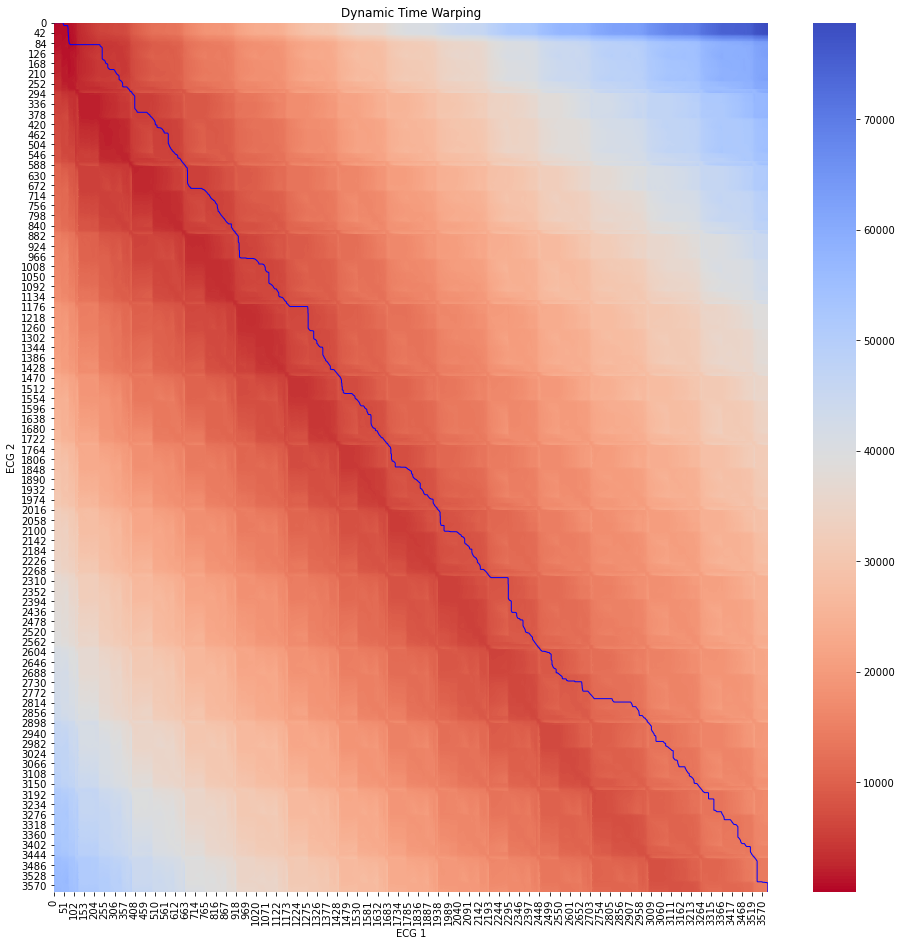

In [12]:
plt.figure(figsize=(16, 16))
ax = plt.axes()
sns.heatmap(cost_matrix, cmap='coolwarm_r', ax=ax)
ax.set_title("Dynamic Time Warping")
ax.set(xlabel='ECG 1', ylabel='ECG 2')

positions = path[1]
a = positions[:,1]
b = positions[:,0]
ax.plot(a + 0.5, b + 0.5, color='blue', linewidth=1)

In [13]:
from libraries.feature_extraction import LargeFrequencyExtractor

lfe = LargeFrequencyExtractor()
database = lfe.fit(database)
# Multilevel discrete decomposition to extract large frequencies from time series

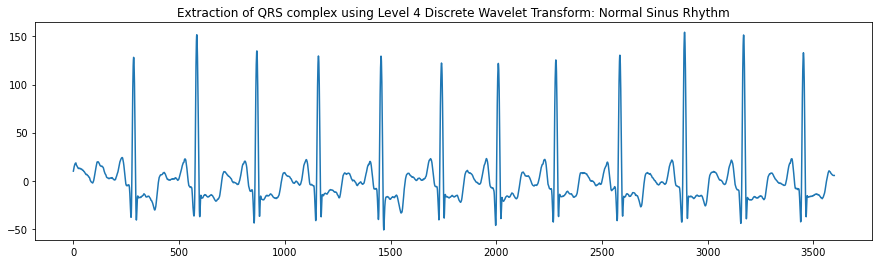

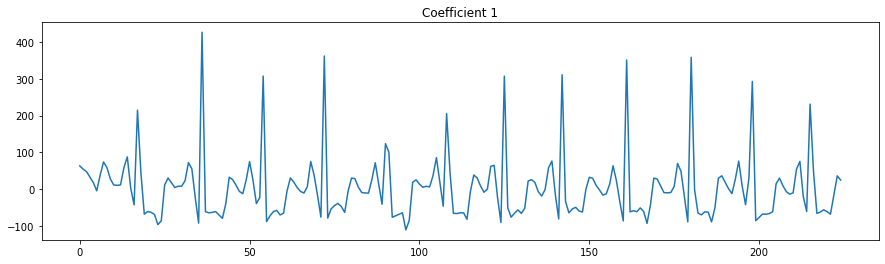

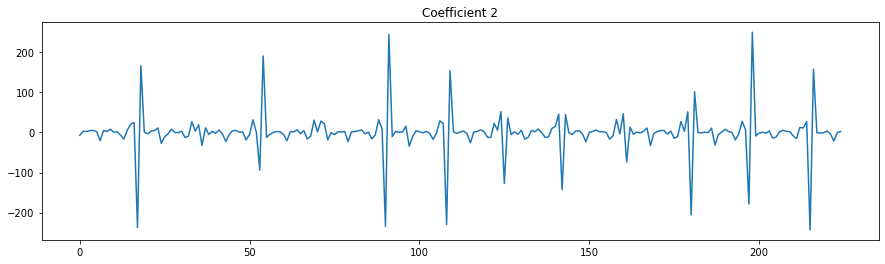

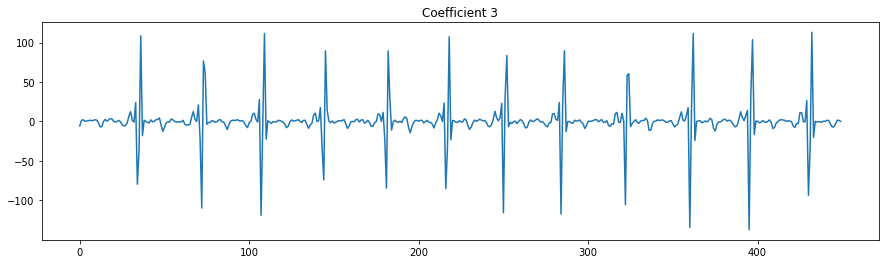

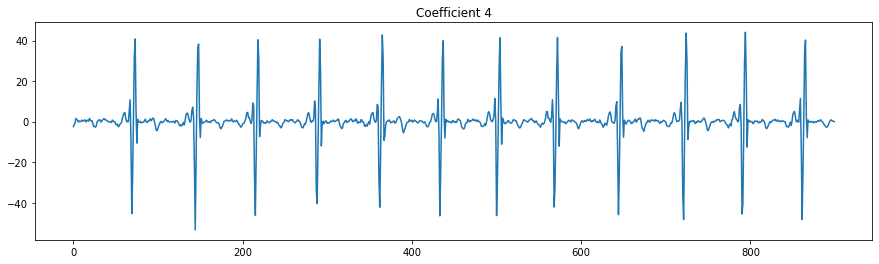

In [14]:
examples = database[database['condition'] == '1 NSR']
example1 = examples.iloc[1]

examples2 = database[database['condition'] == '3 AFL']
example2 = examples2.iloc[2]

plt.figure(figsize=(15,4))
plt.title('Extraction of QRS complex using Level 4 Discrete Wavelet Transform: Normal Sinus Rhythm')
plt.plot(example1['ecg'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Coefficient 1')
plt.plot(example1['coefficient 1'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Coefficient 2')
plt.plot(example1['coefficient 2'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Coefficient 3')
plt.plot(example1['coefficient 3'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('Coefficient 4')
plt.plot(example1['coefficient 4'])
plt.show()

c1 = example1['coefficient 4']

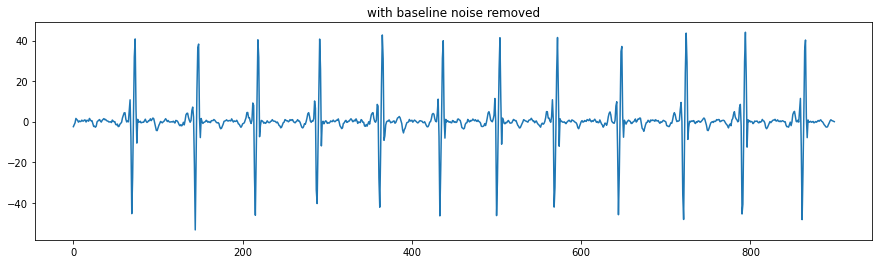

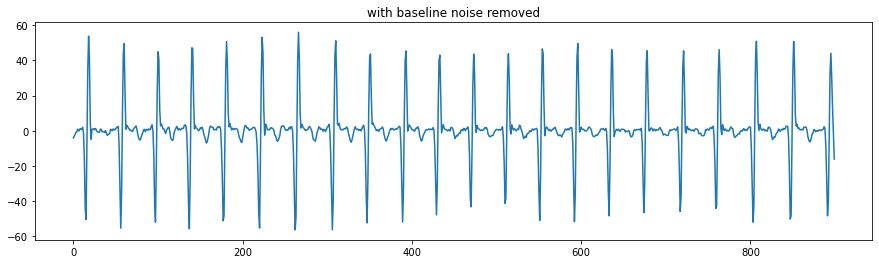

In [15]:
plot_ext('1 NSR', database,  'with baseline noise removed', 1)
plot_ext('3 AFL', database,  'with baseline noise removed', 1)

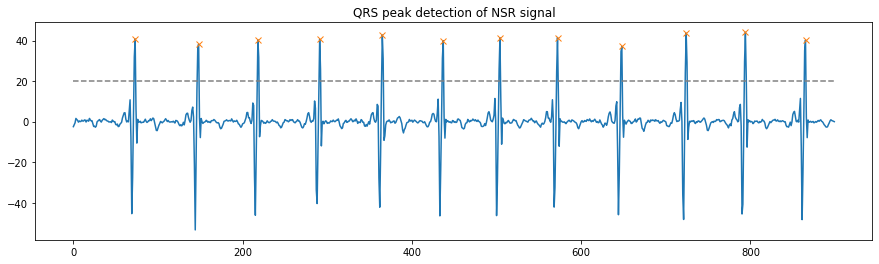

[ 73 148 218 291 365 437 504 572 648 724 794 865] {'peak_heights': array([40.7963892 , 38.26135094, 40.37219553, 40.72223508, 42.7516334 ,
       39.93866414, 41.39250849, 41.50553214, 37.08648416, 43.66202925,
       44.10281853, 40.25838736])}


In [16]:
from libraries.feature_extraction import PeakExtractor

LISTS2 = ['2 APB', '4 AFIB', '5 SVTA', '6 WPW', 
         '7 PVC', '8 Bigeminy', '9 Trigeminy', '10 VT', '11 IVR', 
         '12 VFL', '13 Fusion', '14 LBBBB', '15 RBBBB', '16 SDHB', '17 PR']

for item in LISTS2:
    database = database[database['condition'] != item]

thresh = 20
pe = PeakExtractor(c=thresh)
database = pe.fit(database)

examples = database[database['condition'] == '1 NSR']
example1 = examples.iloc[1]
peaks1 = example1['peaks']
position1 = example1['peak position']
ecg1 = example1['coefficient 4']

plt.figure(figsize=(15,4))
plt.title('QRS peak detection of NSR signal')
plt.plot(ecg1)
plt.plot(peaks1, ecg1[peaks1], "x")
plt.plot(np.ones_like(ecg1) * thresh, "--", color="gray")
plt.show()

print(peaks1, position1) 

In [17]:
from libraries.feature_extraction import MidPointExtractor

mpe = MidPointExtractor()
database = mpe.fit(database)

In [18]:
examples = database[database['condition'] == '1 NSR']

In [19]:
midpoints = database['midpoints']

#for point in midpoints:
    #point = point.astype(int)

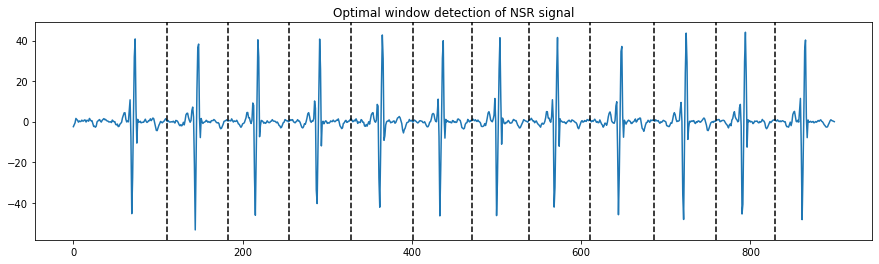

In [20]:
example1 = examples.iloc[1]

plt.figure(figsize=(15,4))
plt.title('Optimal window detection of NSR signal')
plt.plot(ecg1)
mid1 = example1['midpoints']
mid1 = mid1[0,:]
for xv in mid1:
    plt.axvline(x=xv, color='black', linestyle='--')
plt.show()

In [21]:
from libraries.feature_extraction import WaveletSeparator

qrs_db = pd.DataFrame(columns=['condition', 'name', 'ecg'])

ws = WaveletSeparator()
qrs_db = ws.fit(database, qrs_db)

In [22]:
examples1 = qrs_db[qrs_db['condition'] == '1 NSR']
examples2 = qrs_db[qrs_db['condition'] == '3 AFL']
examples1 = examples1.head(20)
examples2 = examples2.head(20)
qrs_db = pd.concat([examples1, examples2])
qrs_db = qrs_db.reset_index(drop = True)

print(qrs_db)

   condition name  ...    partof                                            wavelet
0      1 NSR  NaN  ...  100m (0)  [2.281487639460673, 1.6083006462379537, 0.9351...
1      1 NSR  NaN  ...  100m (0)  [0.4546085021180506, 0.38431357240020514, 1.37...
2      1 NSR  NaN  ...  100m (0)  [0.46183928410077346, 0.9225777803454963, 1.28...
3      1 NSR  NaN  ...  100m (0)  [0.694586641440301, 0.5002927131346571, 0.3940...
4      1 NSR  NaN  ...  100m (0)  [1.211038951201198, 0.6581702645309715, -0.271...
5      1 NSR  NaN  ...  100m (0)  [0.7718726845480193, 0.4301248568274785, 0.529...
6      1 NSR  NaN  ...  100m (0)  [-0.031406516500086745, 1.2161856365589632, 1....
7      1 NSR  NaN  ...  100m (0)  [0.6894747739514546, -0.09990370296869422, -0....
8      1 NSR  NaN  ...  100m (0)  [0.771259578778098, 0.47473185119580563, 0.248...
9      1 NSR  NaN  ...  100m (0)  [-0.05702261086367422, 0.11061470396325124, 1....
10     1 NSR  NaN  ...  100m (0)  [1.0704781435605368, 1.4495264136865194, 0

In [23]:
from libraries.feature_extraction import IntervalLengthExtractor

ile = IntervalLengthExtractor()
i_lengths = ile.fit(qrs_db)
qrs_db['interval lengths'] = i_lengths

In [24]:
from libraries.feature_extraction import QRSHeightExtractor

qrse = QRSHeightExtractor(c = 20)
heights = qrse.fit(qrs_db)

qrs_db['qrs heights'] = heights



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


   condition name  ... qrs heights Trajectory between two ventricular contractions
0      1 NSR  NaN  ...   86.242592                                             NaN
1      1 NSR  NaN  ...   93.089119                                            62.0
2      1 NSR  NaN  ...   83.205177                                            64.0
3      1 NSR  NaN  ...  100.828220                                            66.0
4      1 NSR  NaN  ...   97.948768                                            65.0
5      1 NSR  NaN  ...   80.110281                                            68.0
6      1 NSR  NaN  ...   79.301800                                            71.0
7      1 NSR  NaN  ...   80.973208                                            68.0
8      1 NSR  NaN  ...   96.002695                                            63.0
9      1 NSR  NaN  ...   83.695158                                            63.0
10     1 NSR  NaN  ...   81.560750                                            64.0
11  

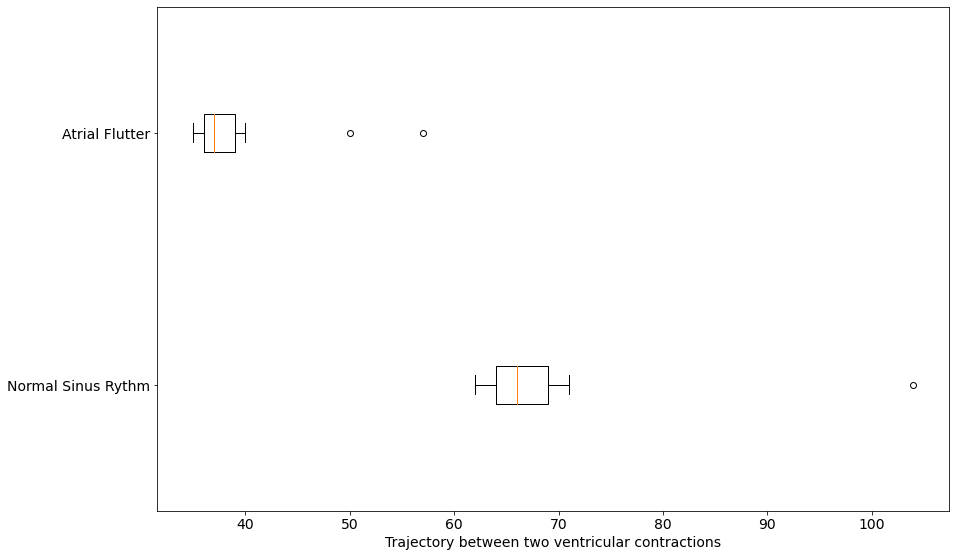

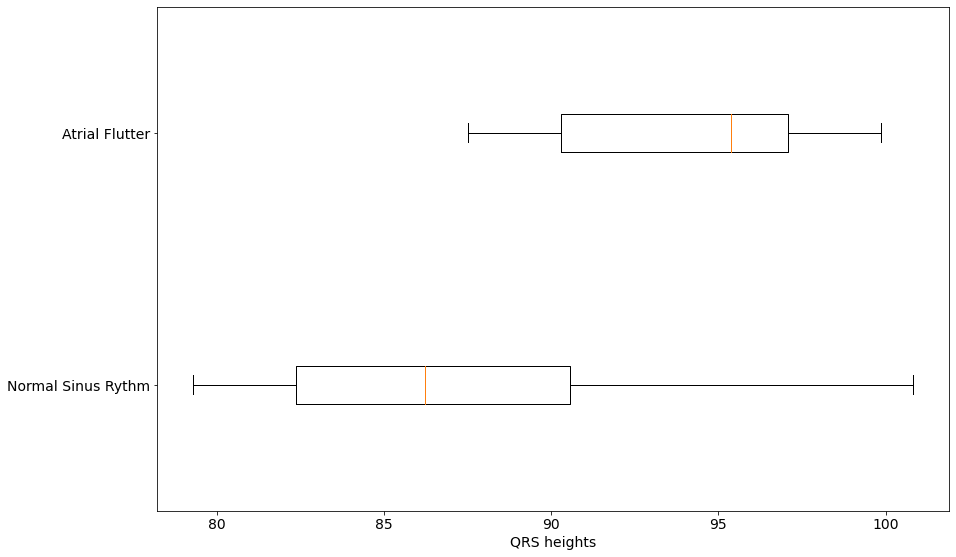

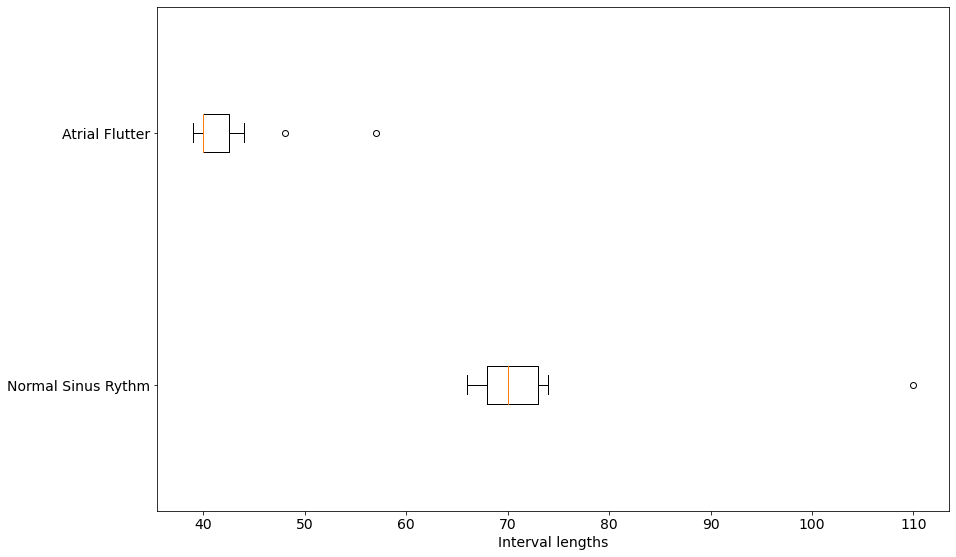

In [25]:
from libraries.feature_extraction import SQLengthExtractor
import matplotlib 

sqle = SQLengthExtractor(c = 20)
sqlengths = sqle.fit(qrs_db)

font = {'family' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

qrs_db['Trajectory between two ventricular contractions'] = sqlengths

print(qrs_db.head(40))

NSR = qrs_db[1:20]
AFL = qrs_db[21:40]

data = [NSR['Trajectory between two ventricular contractions'], AFL['Trajectory between two ventricular contractions']] 
  
fig = plt.figure(figsize =(11, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data, vert = 0) 
#ax.set_xlim(xmin=0)
ax.set_xlabel('Trajectory between two ventricular contractions') 
ax.set_yticklabels(['Normal Sinus Rythm', 'Atrial Flutter']) 


# show plot 
plt.show(bp) 

data = [NSR['qrs heights'], AFL['qrs heights']] 
  
fig = plt.figure(figsize =(11, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data, vert = 0) 
ax.set_xlabel('QRS heights') 
ax.set_yticklabels(['Normal Sinus Rythm', 'Atrial Flutter']) 


# show plot 
plt.show(bp) 

data = [NSR['interval lengths'], AFL['interval lengths']] 
  
fig = plt.figure(figsize =(11, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data, vert = 0) 
ax.set_xlabel('Interval lengths') 
ax.set_yticklabels(['Normal Sinus Rythm', 'Atrial Flutter']) 


# show plot 
plt.show(bp) 

In [26]:


examples1 = qrs_db[qrs_db['condition'] == '1 NSR']
examples2 = qrs_db[qrs_db['condition'] == '3 AFL']

